0  Intro

🌡️ Extreme Temperatures 
Paris → 75
Lyon → 69
Bordeaux → 33
Marseille → 13

We deliberately use daily data rather than hourly data because daily extremes are the standard basis 
for climate and public-health heat indicators, while hourly data would substantially increase 
complexity without improving robustness or interpretability for this project. Daily temperature profiles 
could be used once heatwaves are IDed.  


1  Import libraries

In [33]:
#math libraries
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#other
import os



2 Functions

In [34]:
# define path for raw data
def load_city_data(path):
    """
    Load a Meteo-France CSV file and parse the date column.
    """
    df = pd.read_csv(path, sep=";")
    df.columns = df.columns.astype(str).str.strip()
    df["date"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["date"])
    df = df.drop('AAAAMMJJ', axis=1) # delete as AAAAMMJJ == date
    return df


# Select the top 5 meteo stations per city
def select_top_stations(df, min_tx_days=8000, min_end_year=2015, n_stations=5):
    """
    Select the best weather stations based on:
    - number of available TX (daily max temperature) values
    - recent data availability
    """
    summary = (
        df.groupby(["NUM_POSTE", "NOM_USUEL"])
          .agg(
              n_TX=("TX", "count"),
              start_date=("date", "min"),
              end_date=("date", "max")
          )
          .reset_index()
    )

    selected = (
        summary[
            (summary["n_TX"] >= min_tx_days) &
            (summary["end_date"].dt.year >= min_end_year)
        ]
        .sort_values("n_TX", ascending=False)
        .head(n_stations)
    )

    return selected


# Filter results by city/stations
def filter_city_by_stations(df, stations_df):
    """
    Keep only observations from the selected stations.
    """
    station_ids = stations_df["NUM_POSTE"].tolist()
    return df[df["NUM_POSTE"].isin(station_ids)].copy()


3 Load the data

| Variable | Description |
|--------|------------|
| NUM_POSTE | Station ID |
| NOM_USUEL | Station name |
| LAT | Latitude |
| LON | Longitude |
| ALTI | Altitude (m) |
| AAAAMMJJ | Date (YYYYMMDD) |
| date | Parsed date |
| RR | Daily precipitation (mm) |
| QRR | Quality flag (RR) |
| TN | Daily minimum temperature (°C) |
| QTN | Quality flag (TN) |
| HTN | Time of TN |
| TX | Daily maximum temperature (°C) |
| QTX | Quality flag (TX) |
| HTX | Time of TX |
| TM | Mean daily temperature (°C) |
| QTM | Quality flag (TM) |
| TNTXM | (TN + TX) / 2 |
| TAMPLI | Daily thermal amplitude (TX − TN) |
| TNSOL | Min ground temperature (10 cm) |
| TN50 | Min temperature at 50 cm |
| DG | Frost duration (minutes) |
| FFM | Mean daily wind speed (10 m) |
| FF2M | Mean wind speed (2 m) |
| FXY | Max hourly wind (10 m) |
| DXY | Direction of max wind |
| HXY | Time of max wind |
| FXI | Max instantaneous wind (10 m) |
| DXI | Direction of FXI |
| HXI | Time of FXI |
| FXI2 | Max instantaneous wind (2 m) |
| FXI3S | Max 3-second wind gust |
| DRR | Duration of precipitation (min) |
| Q* | Quality flag for variable `*` |


In [35]:
# =========================
# Base path to data folder.
# =========================
DATA_DIR = "data"

# =========================
# File paths
# =========================
PATH_75 = f"{DATA_DIR}/Paris_Q_75_previous-1950-2024_RR-T-Vent.zip"
PATH_13 = f"{DATA_DIR}/Marseille_Q_13_previous-1950-2024_RR-T-Vent.zip"
PATH_33 = f"{DATA_DIR}/Bordeaux_Q_33_previous-1950-2024_RR-T-Vent.zip"
PATH_69 = f"{DATA_DIR}/Lyon_Q_69_previous-1950-2024_RR-T-Vent.zip"

# =========================
# Load data
# =========================
df_75 = load_city_data(PATH_75)
df_13 = load_city_data(PATH_13)
df_33 = load_city_data(PATH_33)
df_69 = load_city_data(PATH_69)


# =========================
# Preview data
# =========================
print('Paris')
display(df_75.head())
display(df_75.columns)
print('Marseille')
display(df_13.head())
display(df_13.columns)
print('Bordeaux')
display(df_33.head())
display(df_33.columns)
print('Lyon')
display(df_69.head())
display(df_69.columns)

Paris


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,75101001,INNOCENTS,48.860667,2.348333,37,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-01
1,75101001,INNOCENTS,48.860667,2.348333,37,1.8,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-02
2,75101001,INNOCENTS,48.860667,2.348333,37,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-03
3,75101001,INNOCENTS,48.860667,2.348333,37,0.2,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-04
4,75101001,INNOCENTS,48.860667,2.348333,37,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950-01-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Marseille


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-01
1,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-02
2,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-03
3,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-04
4,13001002,AIX-PUYRICARD,43.593333,5.413333,314,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962-07-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Bordeaux


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-15
1,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-16
2,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-17
3,33004001,AMBES,45.041667,-0.608333,5,21.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-18
4,33004001,AMBES,45.041667,-0.608333,5,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-19


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

Lyon


,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR,QRR,TN,QTN,HTN,...,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR,date
0,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-01
1,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-02
2,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-03
3,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-04
4,69006001,AMPLEPUIS BOURG,45.971667,4.331667,435,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963-03-05


Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'RR', 'QRR', 'TN',
       'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM', 'TNTXM',
       'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50', 'DG',
       'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY', 'DXY', 'QDXY',
       'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI2',
       'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S', 'QFXI3S', 'DXI3S',
       'QDXI3S', 'HXI3S', 'QHXI3S', 'DRR', 'QDRR', 'date'],
      dtype='object')

4 Select the 5 stations to keep per city  (same logic for selection) 

In [36]:
# 4. Select top 5 stations per city (single source of truth)
stations_75 = select_top_stations(df_75)  # Paris
stations_13 = select_top_stations(df_13)  # Marseille
stations_33 = select_top_stations(df_33)  # Bordeaux
stations_69 = select_top_stations(df_69)  # Lyon

5  Apply station selection 

In [37]:
df_75_top = filter_city_by_stations(df_75, stations_75)  # Paris
df_13_top = filter_city_by_stations(df_13, stations_13)  # Marseille
df_33_top = filter_city_by_stations(df_33, stations_33)  # Bordeaux
df_69_top = filter_city_by_stations(df_69, stations_69)  # Lyon

6 Select variables and rename (work only from *_top dataframes)

In [38]:


# Variables retained and renamed for clarity
rename_map = {
    'TM': 'temp_mean_c',
    'TX': 'temp_max_c',

    'FFM': 'wind_mean_10m_ms',
    'FF2M': 'wind_mean_2m_ms',
    'FXY': 'wind_max_hourly_ms',
    'FXI': 'wind_max_inst_ms',
    'FXI3S': 'wind_gust_3s_ms',

    'DXY': 'wind_dir_max_deg',
    'DXI': 'wind_dir_inst_deg'
}

cols_to_keep = ['date'] + list(rename_map.keys())

# Apply variable selection and renaming
df_75_climate = df_75_top[cols_to_keep].rename(columns=rename_map).copy()  # Paris
df_13_climate = df_13_top[cols_to_keep].rename(columns=rename_map).copy()  # Marseille
df_33_climate = df_33_top[cols_to_keep].rename(columns=rename_map).copy()  # Bordeaux
df_69_climate = df_69_top[cols_to_keep].rename(columns=rename_map).copy()  # Lyon

7 save the dates

In [39]:

# Add city labels
df_75_climate["city"] = "Paris"
df_13_climate["city"] = "Marseille"
df_33_climate["city"] = "Bordeaux"
df_69_climate["city"] = "Lyon"

# Merge all cities into one dataframe
df_climate_all = pd.concat(
    [df_75_climate, df_13_climate, df_33_climate, df_69_climate],
    ignore_index=True
)

# Basic sanity check
df_climate_all = df_climate_all.sort_values(["city", "date"]).reset_index(drop=True)

# Save final preprocessed dataset with wind

# Create output folder for per-city files
CITY_OUT_DIR = "data/1_outputs"
os.makedirs(CITY_OUT_DIR, exist_ok=True)

# Save one file per city
#df_75_climate.to_csv(f"{CITY_OUT_DIR}/Paris_temp_wind_top_stations.csv", index=False)
#df_13_climate.to_csv(f"{CITY_OUT_DIR}/Marseille_temp_wind_top_stations.csv", index=False)
#df_33_climate.to_csv(f"{CITY_OUT_DIR}/Bordeaux_temp_wind_top_stations.csv", index=False)
#df_69_climate.to_csv(f"{CITY_OUT_DIR}/Lyon_temp_wind_top_stations.csv", index=False)


8.1 Analyzsis of wind data

In [40]:
# ===============================
# Wind variable availability per city
# ===============================

wind_vars = [
    "wind_mean_10m_ms",
    "wind_mean_2m_ms",
    "wind_max_hourly_ms",
    "wind_max_inst_ms",
    "wind_gust_3s_ms",
    "wind_dir_max_deg",
    "wind_dir_inst_deg"
]

city_dfs = {
    "Paris": df_75_climate,
    "Marseille": df_13_climate,
    "Bordeaux": df_33_climate,
    "Lyon": df_69_climate
}

rows = []

for city, df in city_dfs.items():
    for var in wind_vars:
        rows.append({
            "city": city,
            "variable": var,
            "n_non_null": df[var].notna().sum(),
            "coverage_%": round(df[var].notna().mean() * 100, 1)
        })

wind_availability = pd.DataFrame(rows)

# ML-ready variables (example threshold)
ml_ready_wind = wind_availability[wind_availability["coverage_%"] >= 80]

# Optional: wide view for quick inspection
wind_availability_wide = wind_availability.pivot(
    index="variable",
    columns="city",
    values="coverage_%"
)

wind_availability, ml_ready_wind, wind_availability_wide

(         city            variable  n_non_null  coverage_%
 0       Paris    wind_mean_10m_ms       33002        31.6
 1       Paris     wind_mean_2m_ms           0         0.0
 2       Paris  wind_max_hourly_ms       23395        22.4
 3       Paris    wind_max_inst_ms       35639        34.2
 4       Paris     wind_gust_3s_ms       24329        23.3
 5       Paris    wind_dir_max_deg       23190        22.2
 6       Paris   wind_dir_inst_deg       31020        29.7
 7   Marseille    wind_mean_10m_ms      113203        83.9
 8   Marseille     wind_mean_2m_ms           0         0.0
 9   Marseille  wind_max_hourly_ms       80480        59.6
 10  Marseille    wind_max_inst_ms      118340        87.7
 11  Marseille     wind_gust_3s_ms       72789        53.9
 12  Marseille    wind_dir_max_deg       80432        59.6
 13  Marseille   wind_dir_inst_deg      109384        81.0
 14   Bordeaux    wind_mean_10m_ms       81396        59.4
 15   Bordeaux     wind_mean_2m_ms        9917         7

8.2 Intrepretation of wind data: which  feature has the best coverage?

-------------------
wind_max_inst_ms
--------------------

From above, Marseille has the best coverage

In [41]:
# ===============================
# Select ONE wind variable for all cities
# ===============================

# minimum coverage across cities per variable
score_table = (
    wind_availability
    .groupby("variable")["coverage_%"]
    .min()
    .reset_index()
    .rename(columns={"coverage_%": "min_coverage_%"})
    .sort_values("min_coverage_%", ascending=False)
)

score_table

,variable,min_coverage_%
4,wind_max_inst_ms,20.0
5,wind_mean_10m_ms,20.0
0,wind_dir_inst_deg,16.8
3,wind_max_hourly_ms,13.8
1,wind_dir_max_deg,13.8
2,wind_gust_3s_ms,11.7
6,wind_mean_2m_ms,0.0


9 Examine the stations selected

In [42]:
print("Paris stations:")
print(stations_75[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Lyon stations:")
print(stations_69[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Bordeaux stations:")
print(stations_33[["NUM_POSTE", "NOM_USUEL", "n_TX"]])
print('\n')
print("Marseille stations:")
print(stations_13[["NUM_POSTE", "NOM_USUEL", "n_TX"]])


Paris stations:
    NUM_POSTE         NOM_USUEL   n_TX
16   75114001  PARIS-MONTSOURIS  27394
3    75106001        LUXEMBOURG  17014
23   75116002         BAGATELLE   9608
6    75107005       TOUR EIFFEL   9577
15   75113002       SALPETRIERE   9556


Lyon stations:
    NUM_POSTE       NOM_USUEL   n_TX
10   69029001       LYON-BRON  27394
75   69204002  ST-GENIS-LAVAL  27328
56   69141001         MORNANT  27021
53   69135001         MONSOLS  26874
99   69264001    VILLEFRANCHE  24827


Bordeaux stations:
     NUM_POSTE                NOM_USUEL   n_TX
75    33236002               CAP-FERRET  27394
81    33281001        BORDEAUX-MERIGNAC  27394
143   33529001                   CAZAUX  27394
131   33504001                SAUTERNES  27393
153   33550001  VILLENAVE D'ORNON-INRAE  27363


Marseille stations:
     NUM_POSTE          NOM_USUEL   n_TX
44    13047001             ISTRES  27394
51    13054001          MARIGNANE  27394
108   13103001  SALON DE PROVENCE  27394
2     13001009    AIX 

10  👀 Visualize Tx (Max temp: weather) and averaged tempartures (climate change)

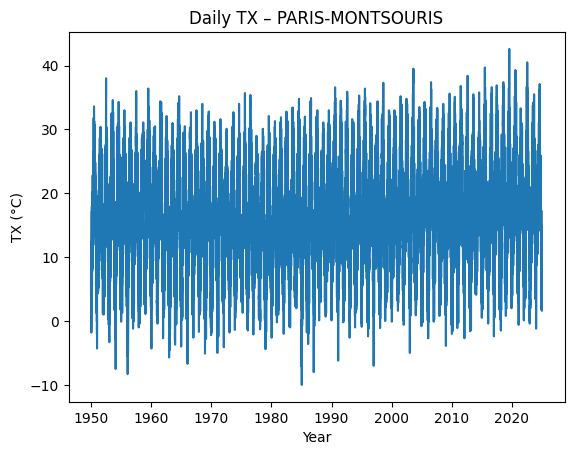

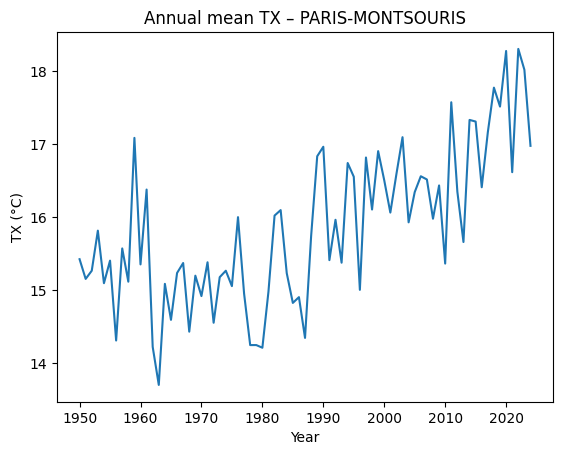

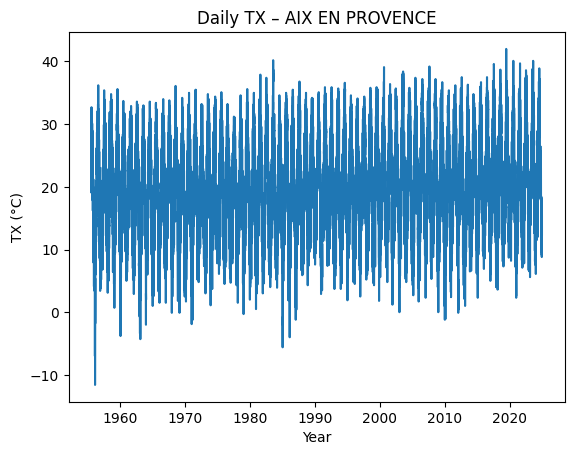

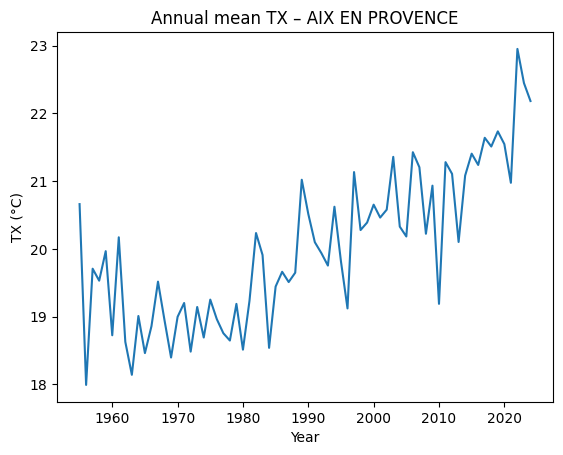

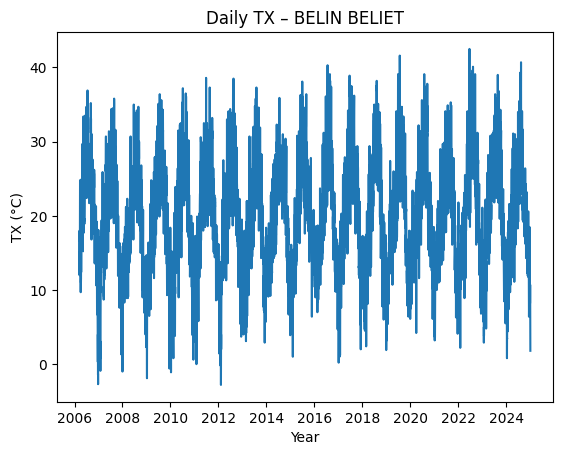

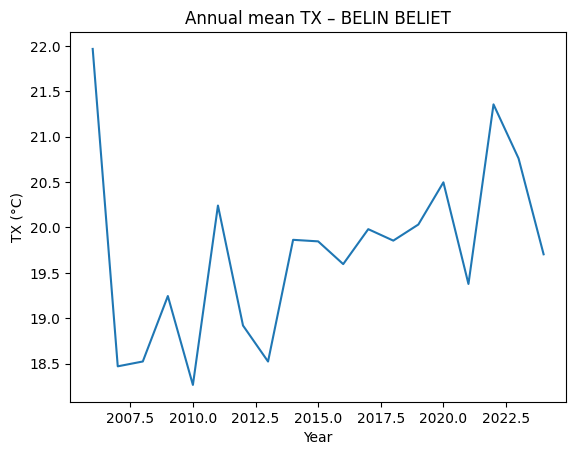

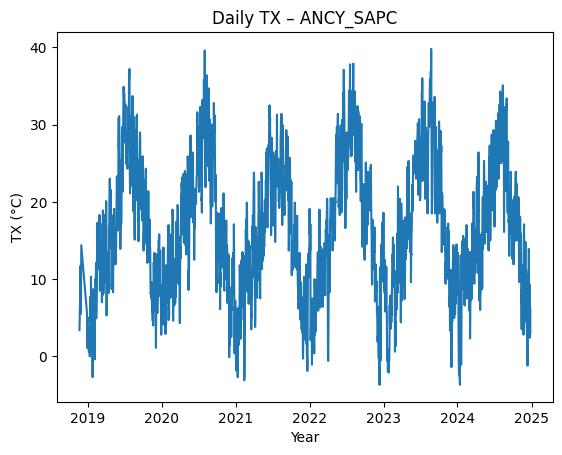

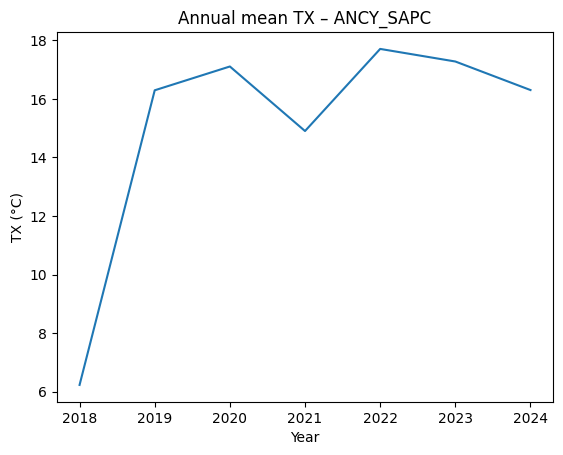

In [44]:


# =========================
# Functions 
# =========================

def prepare_df(df):
    df = df.copy()
    df["date"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d")
    return df

def station_quality(df):
    return (
        df.groupby("NOM_USUEL")["TX"]
        .apply(lambda x: x.isna().mean())
        .sort_values()
    )

def plot_daily_tx(df, station):
    d = df[df["NOM_USUEL"] == station]
    plt.figure()
    plt.plot(d["date"], d["TX"])
    plt.title(f"Daily TX – {station}")
    plt.xlabel("Year")
    plt.ylabel("TX (°C)")
    plt.show()

# This operation groups daily TX values by calendar year and 
# computes the arithmetic mean for each year, without applying any running or rolling average.
def plot_annual_tx(df, station):
    d = df[df["NOM_USUEL"] == station].dropna(subset=["TX"])
    d["year"] = d["date"].dt.year
    annual = d.groupby("year")["TX"].mean()

    plt.figure()
    plt.plot(annual.index, annual.values)
    plt.title(f"Annual mean TX – {station}")
    plt.xlabel("Year")
    plt.ylabel("TX (°C)")
    plt.show()

def export_city(df, city_name):
    cols = ["date", "NUM_POSTE", "NOM_USUEL", "TX", "TN", "LAT", "LON", "ALTI"]
    df[cols].to_csv(f"{city_name}_daily_TX_raw.csv", index=False)

# =========================
# Apply to all cities
# =========================

cities = {
    "Paris": df_75,
    "Marseille": df_13,
    "Bordeaux": df_33,
    "Lyon": df_69
}

for city, df in cities.items():
    #df = prepare_df(df)

    tx_missing = station_quality(df)
    best_station = tx_missing.index[0]

    plot_daily_tx(df, best_station)
    plot_annual_tx(df, best_station)

    #export_city(df, city)

Paris – Best station: PARIS-MONTSOURIS


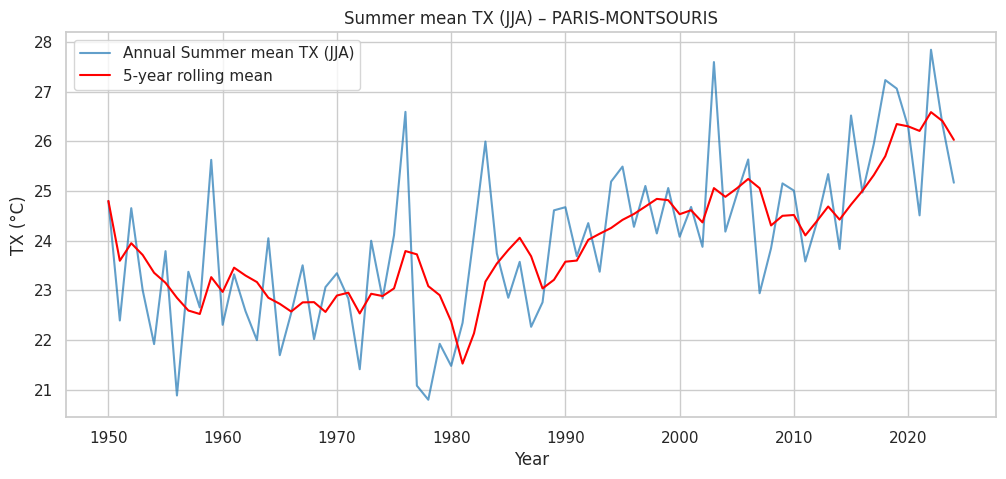

Marseille – Best station: AIX EN PROVENCE


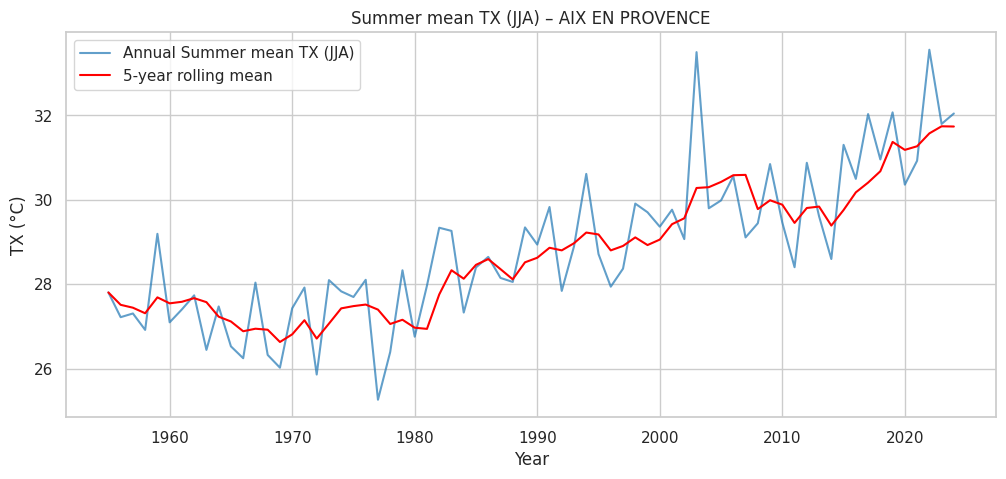

Bordeaux – Best station: BELIN BELIET


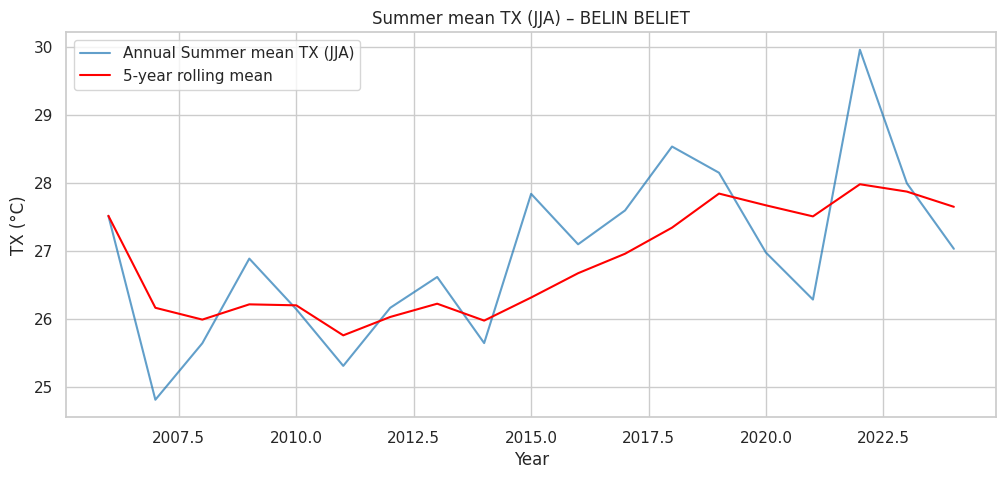

Lyon – Best station: ANCY_SAPC


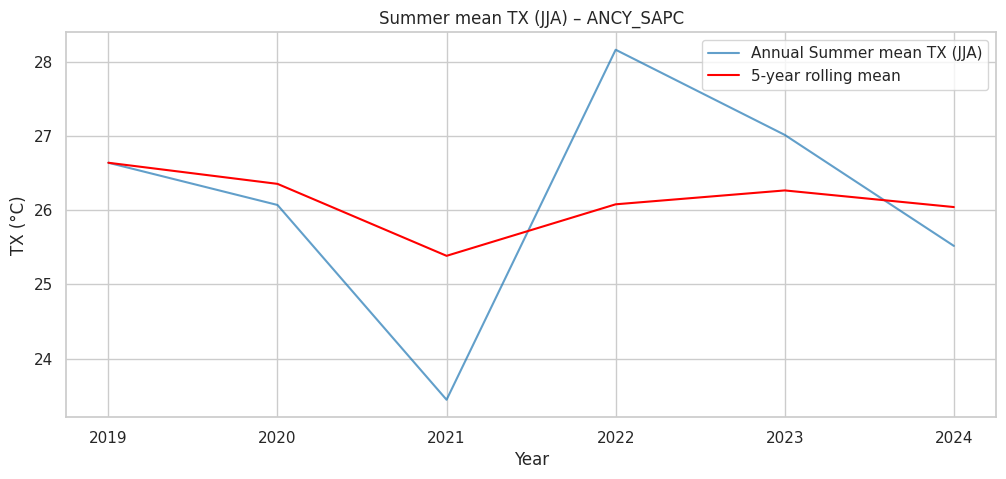

In [45]:
sns.set(style="whitegrid", palette="tab10")
plt.rcParams["figure.figsize"] = (12, 5)

def plot_summer_mean_tx_rolling(df, station, window=5):
    """
    Plots mean TX for summer months (JJA) for a given station as a rolling annual mean.
    - window: size of rolling window in years
    """
    # Filter summer months
    summer_df = df[(df["NOM_USUEL"] == station) & (df["date"].dt.month.isin([6,7,8]))].dropna(subset=["TX"])
    
    # Compute annual summer mean
    summer_mean = summer_df.groupby(summer_df["date"].dt.year)["TX"].mean()
    
    # Compute rolling mean
    summer_mean_roll = summer_mean.rolling(window=window, min_periods=1).mean()
    
    # Plot
    plt.figure()
    sns.lineplot(x=summer_mean.index, y=summer_mean, alpha=0.7, label="Annual Summer mean TX (JJA)")
    sns.lineplot(x=summer_mean_roll.index, y=summer_mean_roll, color="red", label=f"{window}-year rolling mean")
    
    plt.title(f"Summer mean TX (JJA) – {station}")
    plt.xlabel("Year")
    plt.ylabel("TX (°C)")
    plt.legend()
    plt.show()


# =========================
# All cities
# =========================

cities = {
    "Paris": df_75,
    "Marseille": df_13,
    "Bordeaux": df_33,
    "Lyon": df_69
}

# Loop through cities
for city, df in cities.items():
    # Pick the best station (fewest missing TX)
    best_station = df.groupby("NOM_USUEL")["TX"].apply(lambda x: x.isna().mean()).sort_values().index[0]
    
    print(f"{city} – Best station: {best_station}")
    plot_summer_mean_tx_rolling(df, best_station, window=5)

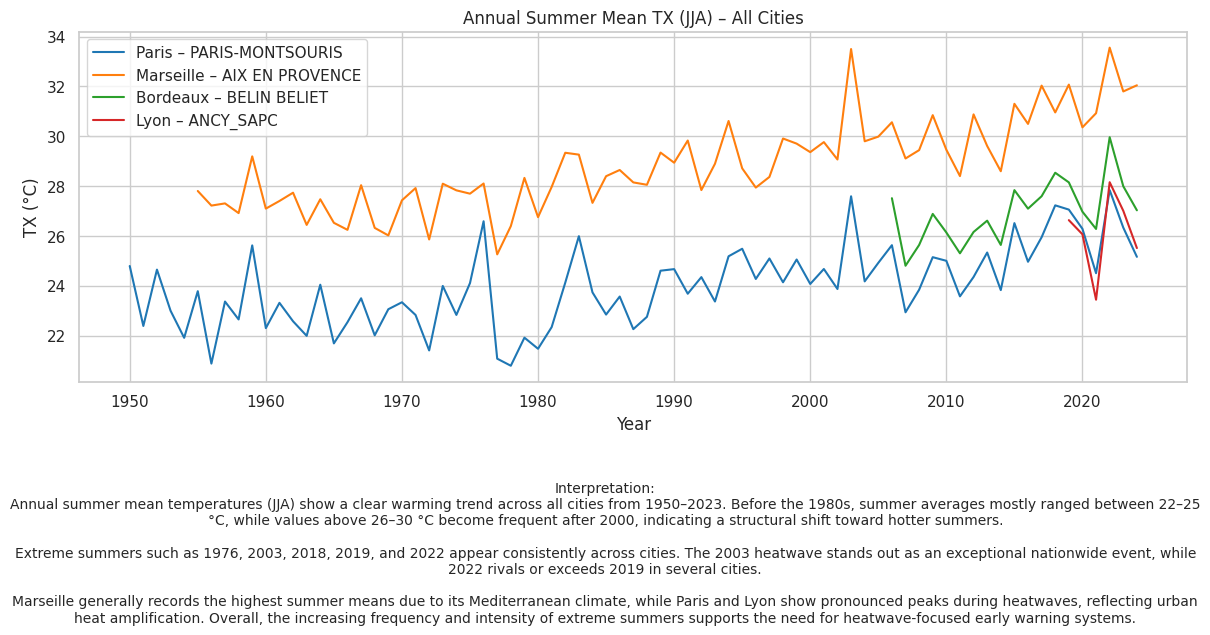

In [46]:
def plot_summer_mean_all_cities(df_dict):
    """
    Plots annual summer mean TX (JJA --> summer months) for all cities
    with an interpretation text below the figure.
    """

    fig, ax = plt.subplots()

    for city, df in df_dict.items():
        # Select best station (fewest missing TX values)
        best_station = (
            df.groupby("NOM_USUEL")["TX"]
            .apply(lambda x: x.isna().mean())
            .sort_values()
            .index[0]
        )

        # Filter summer months (JJA)
        summer_df = df[
            (df["NOM_USUEL"] == best_station) &
            (df["date"].dt.month.isin([6, 7, 8]))
        ].dropna(subset=["TX"])

        # Compute annual summer mean
        summer_mean = summer_df.groupby(
            summer_df["date"].dt.year
        )["TX"].mean()

        # Plot
        sns.lineplot(
            x=summer_mean.index,
            y=summer_mean,
            label=f"{city} – {best_station}",
            ax=ax
        )

    ax.set_title("Annual Summer Mean TX (JJA) – All Cities")
    ax.set_xlabel("Year")
    ax.set_ylabel("TX (°C)")
    ax.legend()

    # Interpretation text below the plot
    interpretation_text = (
        "Interpretation:\n"
        "Annual summer mean temperatures (JJA) show a clear warming trend across all cities from 1950–2023. "
        "Before the 1980s, summer averages mostly ranged between 22–25 °C, while values above 26–30 °C "
        "become frequent after 2000, indicating a structural shift toward hotter summers.\n\n"
        "Extreme summers such as 1976, 2003, 2018, 2019, and 2022 appear consistently across cities. "
        "The 2003 heatwave stands out as an exceptional nationwide event, while 2022 rivals or exceeds "
        "2019 in several cities.\n\n"
        "Marseille generally records the highest summer means due to its Mediterranean climate, "
        "while Paris and Lyon show pronounced peaks during heatwaves, reflecting urban heat amplification. "
        "Overall, the increasing frequency and intensity of extreme summers supports the need for "
        "heatwave-focused early warning systems."
    )

    fig.text(
        0.5, 0.02,
        interpretation_text,
        ha="center",
        va="top",
        fontsize=10,
        wrap=True
    )

    # Make space for the interpretation text
    plt.tight_layout(rect=[0, 0.08, 1, 1])
    plt.show()


# Dictionary of city DataFrames
cities = {
    "Paris": df_75,
    "Marseille": df_13,
    "Bordeaux": df_33,
    "Lyon": df_69
}

plot_summer_mean_all_cities(cities)

In [49]:
# Color mapping for cities

city_colors = {
    "Paris": "blue",
    "Marseille": "orange",
    "Bordeaux": "green",
    "Lyon": "red"
}


# Prepare data

# df_all_cities = pd.concat()

extreme_days_all = df_all_cities.dropna(subset=["TX"]).copy()
ABS_THRESHOLD = 35.0
extreme_days_all["is_extreme_35"] = extreme_days_all["TX"] > ABS_THRESHOLD

# Replace NaN values with 0 to represent years without extreme days
# extreme_days_all_filled = extreme_days_all.fillna(0)

# Ensure chronological order of years
# extreme_days_all_filled.sort_index(inplace=True)


# Create stacked bar chart

fig, ax = plt.subplots(figsize=(14, 6))

extreme_days_all_filled.plot(
    kind="bar",
    stacked=True,
    color=[city_colors[c] for c in extreme_days_all_filled.columns],
    width=0.8,
    ax=ax
)


# Axis labels and title

ax.set_title("Extreme Days per Year (TX ≥ 35°C) – Stacked by City")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Extreme Days")
ax.legend(title="City", ncol=4)

# Interpretation below the figure

fig.text(
    0.5,
    0.02,
    "The stacked bars show the annual number of extreme heat days (TX ≥ 35°C) for each city. "
    "A clear increase is visible over time, particularly after the 1990s, indicating rising "
    "exposure to dangerous heat conditions. Years such as 1976, 2003, 2018, 2019, and 2022 "
    "stand out as nationwide extreme summers. Marseille consistently records the highest number "
    "of extreme days due to its Mediterranean climate, while Paris and Lyon show strong peaks "
    "during major heatwave years, reflecting urban heat amplification effects.",
    ha="center",
    va="top",
    fontsize=10,
    wrap=True
)

# Adjust layout to reduce excess white space
plt.tight_layout()
plt.show()


NameError: name 'extreme_days_all_filled' is not defined